<a href="https://colab.research.google.com/github/sohamtalukdar/Daphnet-Freezing-of-Gait/blob/main/Lifespark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os
import glob
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

In [ ]:
# Specify the path to the ZIP file and the path where you want to extract it
zip_path = '/content/dataset_fog_release.zip'
extract_path = '/content/dataset_fog_release/'

# Open the ZIP file and extract its contents to the specified location
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path to directory containing text files
dir_path = "/content/dataset_fog_release/dataset_fog_release/dataset/"

# Pattern for selecting text files
file_pattern = "*.txt"

# Output file name
output_file = "combined_data.txt"

# Loop over text files and concatenate contents
with open(output_file, "w") as outfile:
    for file_path in glob.glob(os.path.join(dir_path, file_pattern)):
        with open(file_path, "r") as infile:
            outfile.write(infile.read())

# Read the text file into a DataFrame
df = pd.read_csv(output_file, sep=' ', header=None)

# Add column names to the DataFrame
df.columns = ['Time of sample in millisecond', 'Ankle (shank) acceleration - horizontal forward acceleration [mg]', 'Ankle (shank) acceleration - vertical [mg]', 'Ankle (shank) acceleration - horizontal lateral [mg]', 'Upper leg (thigh) acceleration - horizontal forward acceleration [mg]', 'Upper leg (thigh) acceleration - vertical [mg]', 'Upper leg (thigh) acceleration - horizontal lateral [mg]', 'Trunk acceleration - horizontal forward acceleration [mg]', 'Trunk acceleration - vertical [mg]', 'Trunk acceleration - horizontal lateral [mg]','Annotation [0, 1, or 2]']

# Drop the rows with annotation = 0
df = df.drop(df[df['Annotation [0, 1, or 2]'] == 0].index)


In [5]:
df

,Time of sample in millisecond,Ankle (shank) acceleration - horizontal forward acceleration [mg],Ankle (shank) acceleration - vertical [mg],Ankle (shank) acceleration - horizontal lateral [mg],Upper leg (thigh) acceleration - horizontal forward acceleration [mg],Upper leg (thigh) acceleration - vertical [mg],Upper leg (thigh) acceleration - horizontal lateral [mg],Trunk acceleration - horizontal forward acceleration [mg],Trunk acceleration - vertical [mg],Trunk acceleration - horizontal lateral [mg],"Annotation [0, 1, or 2]"
41599,650000,0,1019,148,0,0,0,58,990,-194,1
41600,650015,-20,1019,148,0,0,0,58,980,-174,1
41601,650031,0,1039,148,0,0,0,48,1009,-184,1
41602,650046,0,1019,168,0,0,0,58,1009,-194,1
41603,650062,10,1019,158,0,0,0,67,990,-165,1
...,...,...,...,...,...,...,...,...,...,...,...
1912055,599937,60,1009,99,-1536,1564,-1424,834,-85,145,1
1912056,599953,60,1019,118,-681,500,-2101,854,-66,223,1
1912057,599968,20,1088,79,1990,962,545,844,-123,145,1
1912058,599984,90,1039,79,390,740,595,1048,-295,271,1


In [6]:
# Group the dataframe by the 'Annotation [0, 1, or 2]' column and calculate the mean values for each group
grouped = df.groupby('Annotation [0, 1, or 2]').mean()

# Print the mean values for annotation 1 and annotation 2
print('Mean values for annotation 1:')
print(grouped.loc[1])
print()
print('Mean values for annotation 2:')
print(grouped.loc[2])


Mean values for annotation 1:
Time of sample in millisecond                                            1.318568e+06
Ankle (shank) acceleration - horizontal forward acceleration [mg]       -1.094772e+02
Ankle (shank) acceleration - vertical [mg]                               9.962012e+02
Ankle (shank) acceleration - horizontal lateral [mg]                     2.446432e+02
Upper leg (thigh) acceleration - horizontal forward acceleration [mg]    5.439395e+00
Upper leg (thigh) acceleration - vertical [mg]                           7.464752e+02
Upper leg (thigh) acceleration - horizontal lateral [mg]                 1.491623e+02
Trunk acceleration - horizontal forward acceleration [mg]                6.093165e+01
Trunk acceleration - vertical [mg]                                       9.544161e+02
Trunk acceleration - horizontal lateral [mg]                             2.719418e+01
Name: 1, dtype: float64

Mean values for annotation 2:
Time of sample in millisecond                          

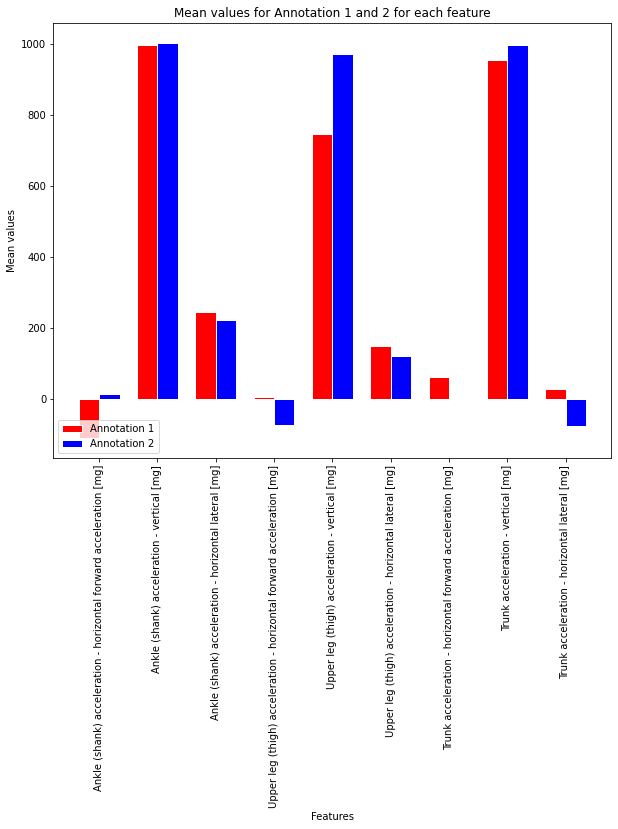

In [7]:


# Define the list of columns to plot
columns_to_plot = ['Ankle (shank) acceleration - horizontal forward acceleration [mg]',
                   'Ankle (shank) acceleration - vertical [mg]',
                   'Ankle (shank) acceleration - horizontal lateral [mg]',
                   'Upper leg (thigh) acceleration - horizontal forward acceleration [mg]',
                   'Upper leg (thigh) acceleration - vertical [mg]',
                   'Upper leg (thigh) acceleration - horizontal lateral [mg]',
                   'Trunk acceleration - horizontal forward acceleration [mg]',
                   'Trunk acceleration - vertical [mg]',
                   'Trunk acceleration - horizontal lateral [mg]']

# Get the mean values for annotation 1 and annotation 2
mean_values_1 = grouped.loc[1, columns_to_plot].values
mean_values_2 = grouped.loc[2, columns_to_plot].values

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(columns_to_plot))
r2 = [x + bar_width for x in r1]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the grouped bar plot
ax.bar(r1, mean_values_1, color='r', width=bar_width, edgecolor='white', label='Annotation 1')
ax.bar(r2, mean_values_2, color='b', width=bar_width, edgecolor='white', label='Annotation 2')

# Add labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Mean values')
ax.set_title('Mean values for Annotation 1 and 2 for each feature')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(columns_to_plot, rotation=90)
ax.legend()

# Show the plot
plt.show()


In [8]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1] # Target variable (Annotation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


# Initialize the decision tree model
clf = DecisionTreeClassifier()

# Compute cross-validation scores
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Compute cross-validation scores for precision, recall, F1-score, and AUC-ROC
precisions = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
recalls = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
auc_rocs = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')

# Print average accuracy, precision, recall, F1-score and AUC-ROC across folds
print("Accuracy:", scores.mean())
print("Precision:", precisions.mean())
print("Recall:", recalls.mean())
print("F1-score:", f1_scores.mean())
print("AUC-ROC:", auc_rocs.mean())


Accuracy: 0.9433211184092581
Precision: 0.9695800724485182
Recall: 0.9674927485223976
F1-score: 0.9685603822061134
AUC-ROC: 0.8431562158854096
